## Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

### Context

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

### Some business Objectives:

Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

### Instructions

1. Import the necessary libraries.
2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.
3. First look at its main features (head, shape, info).
4. Rename the columns so they follow the PE8 (snake case).
5. Change effective to date column to datetime format.
6. Check NaN values per column.
7. Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
9. Get categorical features.
10. What should we do with the customer_id column?

### 1. Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### 3. First look at its main features (head, shape, info).

In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### 4. Rename the columns so they follow the PE8 (snake case).

In [5]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
customer_df = customer_df.rename(columns={'employmentstatus':'employment status'})


def pe8(x):
    x = x.lower()
    x = x.replace(' ','_')
    
    return x


customer_df.columns = map(pe8, customer_df.columns)  
customer_df.columns


Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### 5. Change effective to date column to datetime format.

In [7]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

### 6. Check NaN values per column.

In [8]:
nulls = pd.DataFrame(customer_df.isna().sum()/len(customer_df))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
0,customer,0.0
1,state,0.0
22,vehicle_class,0.0
21,total_claim_amount,0.0
20,sales_channel,0.0
19,renew_offer_type,0.0
18,policy,0.0
17,policy_type,0.0
16,number_of_policies,0.0
15,number_of_open_complaints,0.0


### 7. Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [9]:
#customer_df = customer_df.drop(['customer'], axis = 1)
#customer_df.head()

In [10]:
#separating numerical columns
cols_num = list(customer_df.select_dtypes(include=['number']).columns)
cols_num

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [11]:
#Checking the amount of unique values in the numerical columns
number_u = customer_df[cols_num].nunique()
number_u

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [12]:
type(number_u)

pandas.core.series.Series

In [13]:
#To split vetween discrete and continious - 
#on cindition that there are more than 50 unique values

#numerical daraframe:

cols_num = list(customer_df.select_dtypes(include=['number']).columns)
x = customer_df[cols_num]

In [14]:
#functions to split into continuous and discrete:
x_cont = x.drop(x.columns[x.apply(lambda col:col.nunique() <50)],axis = 1)
display(x_cont)

x_discr = x.drop(x.columns[x.apply(lambda col:col.nunique() >50)],axis = 1)
display(x_discr)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1
...,...,...,...
9129,18,0,2
9130,14,0,1
9131,9,3,2
9132,34,0,3


In [15]:
#what's indide the function
x.apply(lambda y : y.nunique() < 50)

customer_lifetime_value          False
income                           False
monthly_premium_auto             False
months_since_last_claim           True
months_since_policy_inception    False
number_of_open_complaints         True
number_of_policies                True
total_claim_amount               False
dtype: bool

### 8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [16]:
cols_cat = list(customer_df.select_dtypes(include=['object']).columns)
cols_cat

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

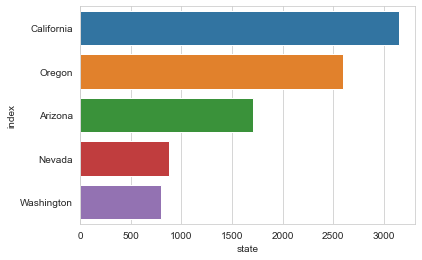

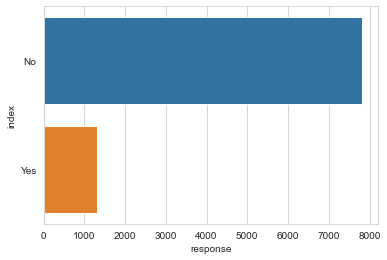

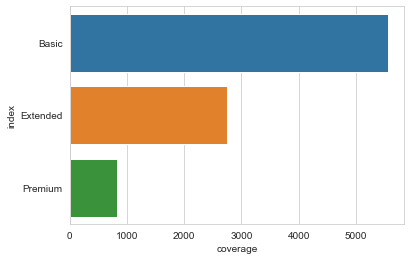

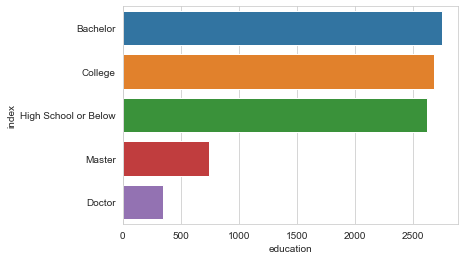

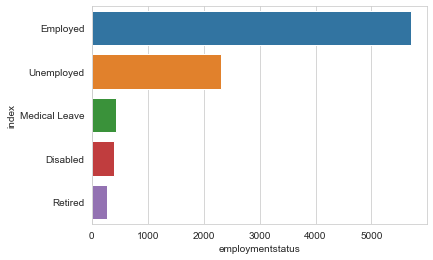

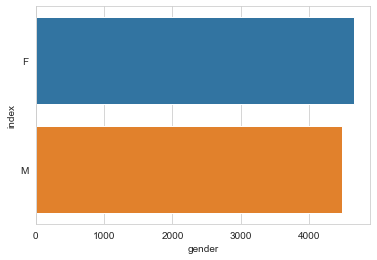

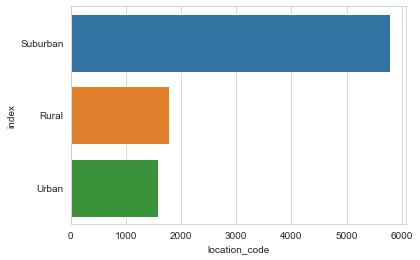

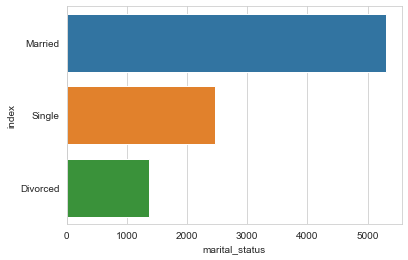

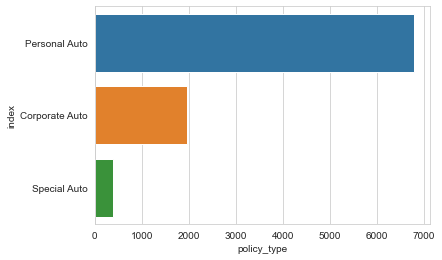

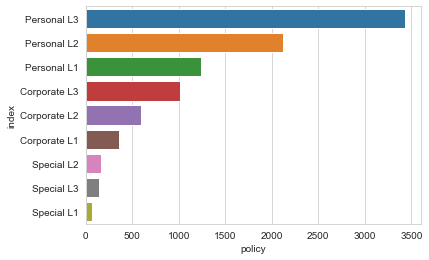

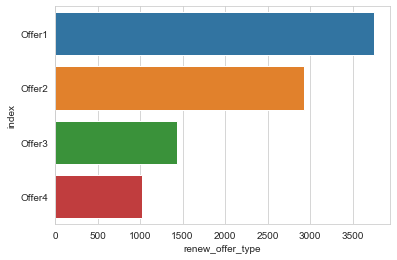

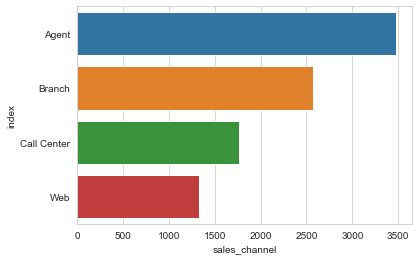

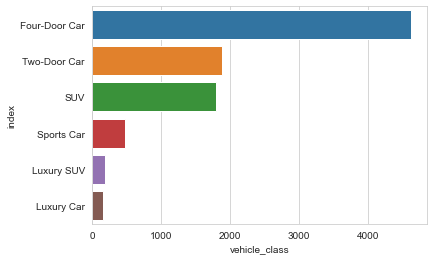

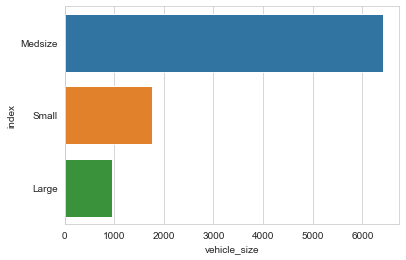

<Figure size 432x288 with 0 Axes>

In [17]:
for col in cols_cat[1:len(cols_cat)]:
    my_data = customer_df[col].value_counts().reset_index()
    ax = sns.barplot(x=col, y="index", data = my_data)
    plt.figure()

#### No furher cleaning required

### 9. Get categorical features.

OHE will be in further LABs 

### 10. What should we do with the customer_id column?

we will reset index as customer later - for potential future use

## Lab | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

Instructions

3. Plot a correlation matrix, what can you see?
4. Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).
5. What can you see in the plots?
6. Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.
7. Have you found outliers? If you have, what should we do with them?

### 3. Plot a correlation matrix.

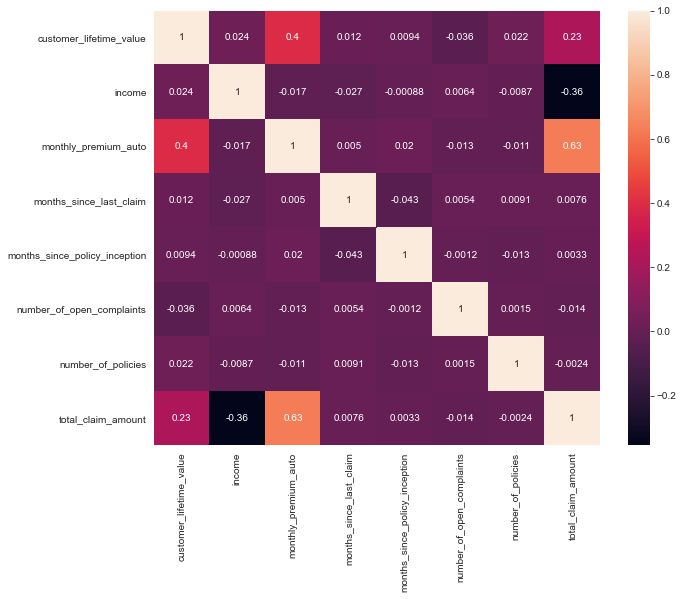

In [18]:
x.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(x.corr(), annot=True)
plt.show()

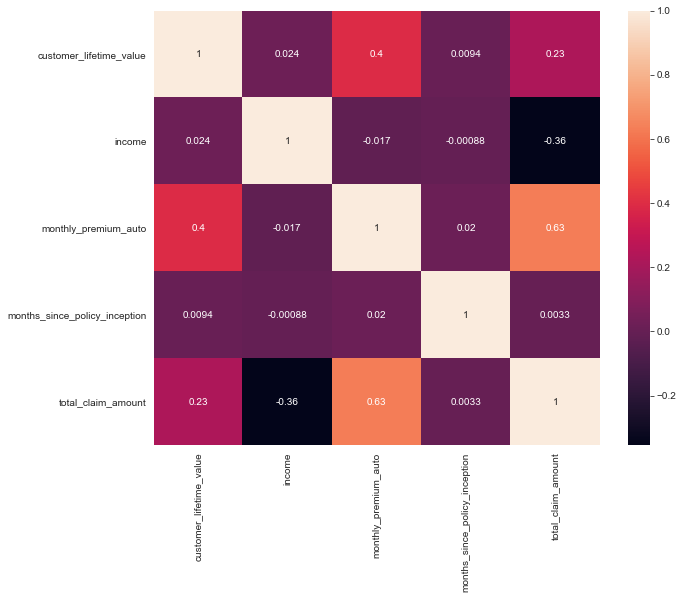

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(x_cont.corr(), annot=True)
plt.show()

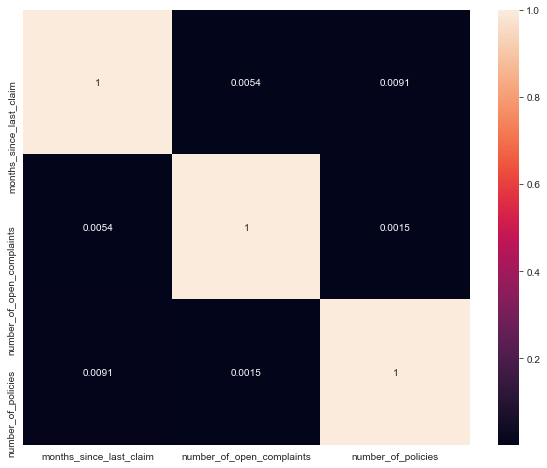

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(x_discr.corr(), annot=True)
plt.show()

In [21]:
#discrete values are not correlated at all 

In [22]:
from scipy.stats import skew
from scipy.stats import kurtosis

### 4. 1. Create a function to plot every discrete variables.  

/Users/annakharchenkova/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


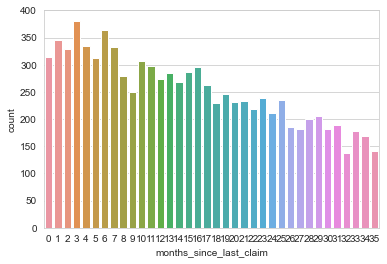

/Users/annakharchenkova/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


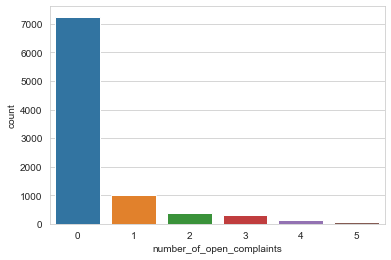

/Users/annakharchenkova/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


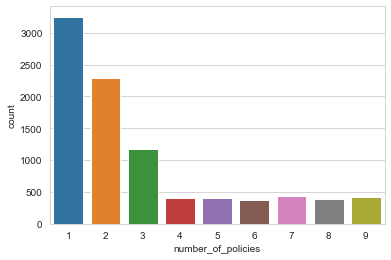

In [23]:
for i in x_discr.columns:
    sns.countplot(x_discr[i])
    plt.show()


 ### 4.2. Create a function to plot continious variables.  

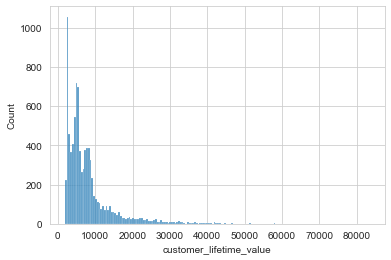

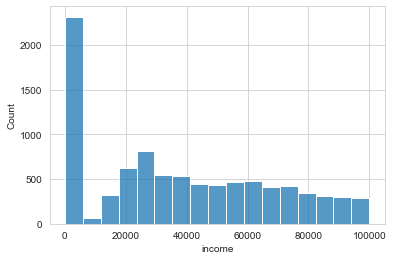

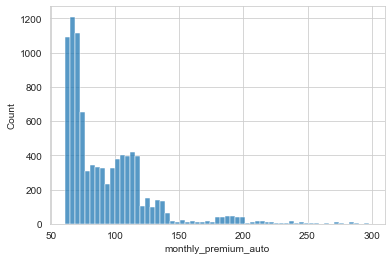

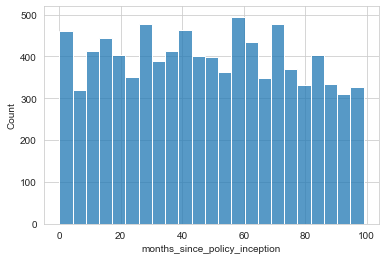

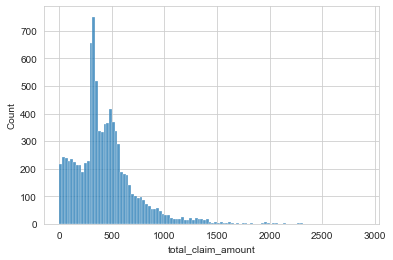

In [24]:
for i in x_cont.columns:
    sns.histplot(x_cont[i])
    plt.show()
    


### 6. Look for outliers in the continuous variables.

/Users/annakharchenkova/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


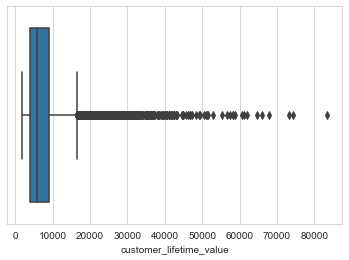

/Users/annakharchenkova/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


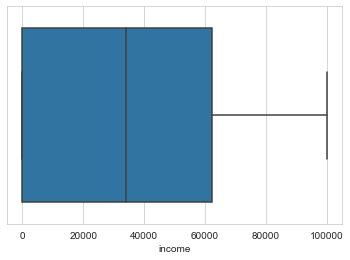

/Users/annakharchenkova/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


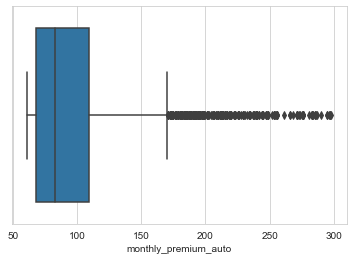

/Users/annakharchenkova/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


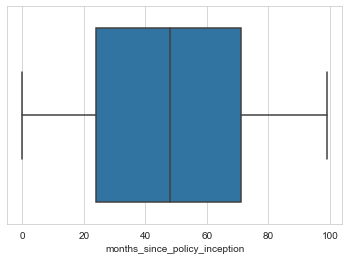

/Users/annakharchenkova/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


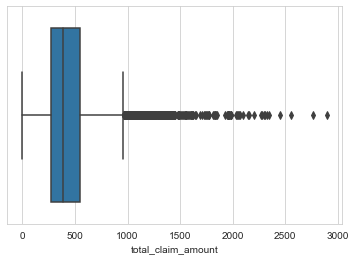

In [25]:
for i in x_cont.columns:
    sns.boxplot(x_cont[i])
    plt.show()

In [26]:
#There are a lot of outlier so we will deal with them in the labs further.

## Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

#### Instructions

1. Open the categoricals variable we created before.

    categoricals = data.select_dtypes(np.object)
    
    categoricals.head()
    
2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?

### 1. Open the categoricals variable we created before.

In [27]:
x_cat = customer_df.select_dtypes(np.object)
x_cat.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 2. Plot all the categorical variables with the proper plot. What can you see?

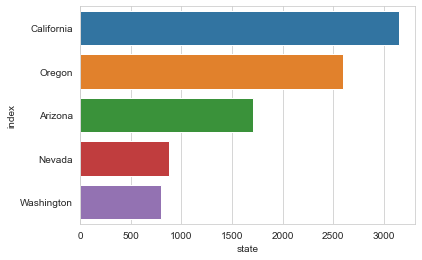

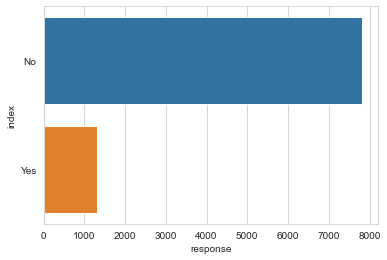

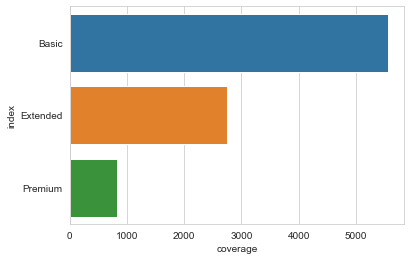

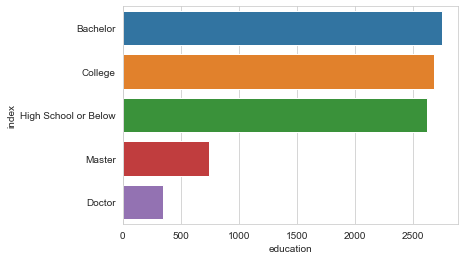

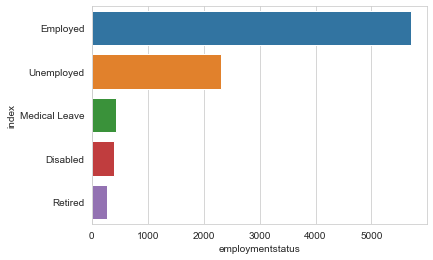

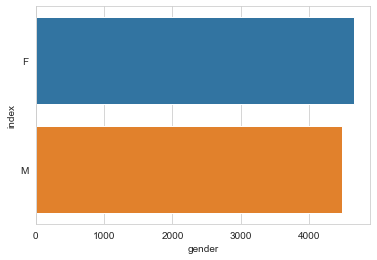

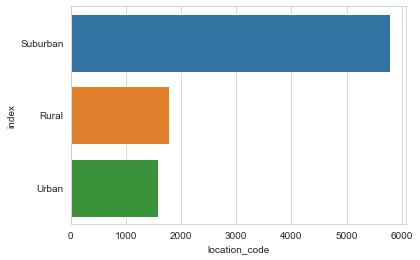

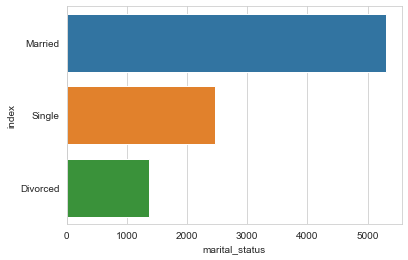

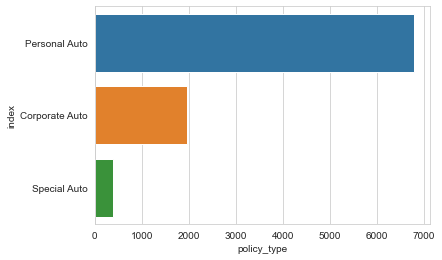

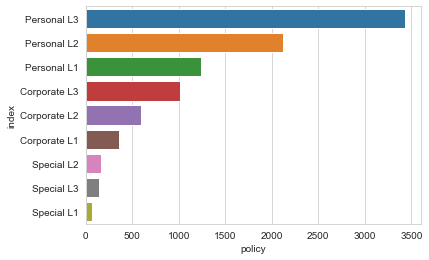

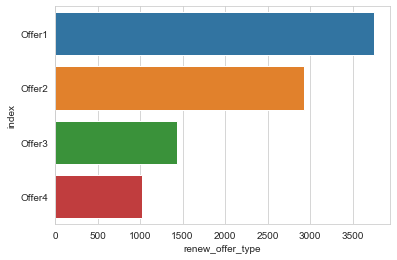

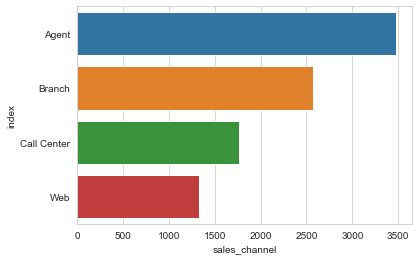

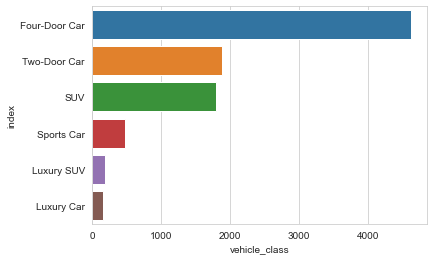

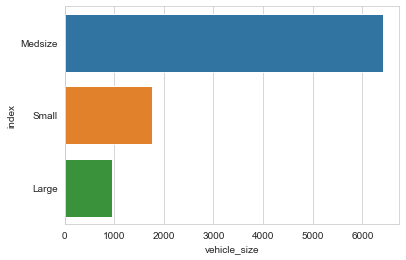

<Figure size 432x288 with 0 Axes>

In [28]:
col = x_cat.columns

for col in x_cat.columns[1:]:
    my_data = x_cat[col].value_counts(dropna = False).reset_index()
    ax = sns.barplot(x=col, y="index", data = my_data)
    plt.figure()

### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [29]:
#we will keep them for now and see whether to drop them further. 
#customer id column will be set to index also further on 

### 4. Plot time variable.

In [30]:
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import numpy as np
import datetime

In [31]:
customer_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

<function matplotlib.pyplot.show(*args, **kw)>

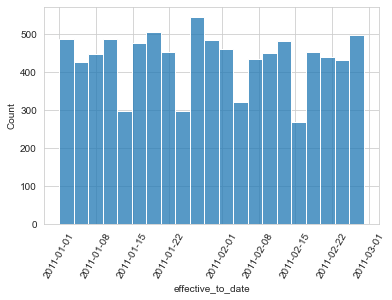

In [32]:
sns.histplot(customer_df['effective_to_date'])
plt.xticks(rotation=60)
plt.show

In [33]:
#pip install --upgrade seaborn

## Lab | Data cleaning and wrangling

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

### Instructions

So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.

1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
2. Create a copy of the dataframe for the data wrangling.
3. Normalize the continuous variables. You can use any one method you want.
4. Encode the categorical variables
5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

### Hint for Categorical Variables

You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

In [34]:
# One hot to state
# Ordinal to coverage
# Ordinal to employmentstatus
# Ordinal to location code
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class
# Ordinal vehicle size

#data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
# given that column "coverage" in the dataframe "data" has three categories:
# "basic", "extended", and "premium" and values are to be represented in the same order.



### 1. Removing outliers. 
So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [35]:
# function to calculate the percentage of outliers: 
# input-dataframe with numerical columns that you want to check

def calc_outliers(data):

    #list with all the column names
    cols = data.columns

    for i in range(len(cols)):
        Q1 = np.quantile(data[cols[i]],0.25)
        Q3 = np.quantile(data[cols[i]],0.75)
        out_border_high = Q3+1.5*(Q3-Q1)
        out_border_low = Q1-1.5*(Q3-Q1)
        
        out_index = data[(data[cols[i]] < out_border_low) | (data[cols[i]] > out_border_high)].index
        
        print("Number of outliers for", cols[i],':', len(out_index))
    
    return

In [36]:
#checking all numerical data to quantity of outliers 
print('total data:', len(x_cont))
calc_outliers(x_cont)

total data: 9134
Number of outliers for customer_lifetime_value : 817
Number of outliers for income : 0
Number of outliers for monthly_premium_auto : 430
Number of outliers for months_since_policy_inception : 0
Number of outliers for total_claim_amount : 453


In [37]:
#checking all numerical data to quantity of outliers 
print('total data:', len(x_discr))
calc_outliers(x_discr)

total data: 9134
Number of outliers for months_since_last_claim : 0
Number of outliers for number_of_open_complaints : 1882
Number of outliers for number_of_policies : 416


#### Create a finction to replace outliers with interpoltion for the continious values:
for customer lifetime value: (it'shighly correlated with total claim amount and 
monthly premium, so not sure whether it makes sense to replace them, 
but will try for practicing purposes 





#### 1.1. Replace outliers with NAN values

In [38]:
#Functioin to replace outliers with nan values

def outlier_to_nan(x):

        Q1 = np.quantile(x, 0.25)
        Q3 = np.quantile(x, 0.75)
        out_border_high = Q3+1.5*(Q3-Q1)
        out_border_low = Q1-1.5*(Q3-Q1)
        
        out_index = x[(x < out_border_low) | (x > out_border_high)].index
        x.loc[out_index] = np.nan
    
        return x

In [39]:
new_cltv = outlier_to_nan(x_cont['customer_lifetime_value'])
new_cltv


/Users/annakharchenkova/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0        2763.519279
1        6979.535903
2       12887.431650
3        7645.861827
4        2813.692575
            ...     
9129             NaN
9130     3096.511217
9131     8163.890428
9132     7524.442436
9133     2611.836866
Name: customer_lifetime_value, Length: 9134, dtype: float64

#### 1.2. Interpolation

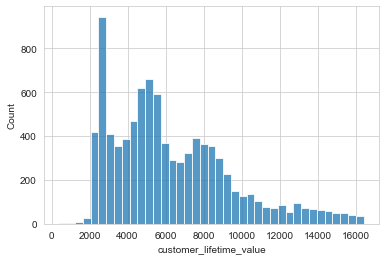

In [40]:
new_cltv = new_cltv.interpolate(method='akima')
sns.histplot(new_cltv)

In [41]:
x_cont['customer_lifetime_value'] = new_cltv
x_cont

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,3414.253973,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


### 2. Create a copy of the dataframe for the data wrangling.

In [42]:
#creating copies of separate df
x_cont_copy = x_cont.copy()
x_discr_copy = x_discr.copy()
x_cat_copy = x_cat.copy()

### 3. Normalize the continuous variables. You can use any one method you want.

In [43]:
#separating target
y = x_cont['total_claim_amount']
x_cont = x_cont.drop(['total_claim_amount'], axis = 1)
x_cont.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception
0,2763.519279,56274,69,5
1,6979.535903,0,94,42
2,12887.431650,48767,108,38
3,7645.861827,0,106,65
4,2813.692575,43836,73,44


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_cont_stand = pd.DataFrame(scaler.fit_transform(x_cont), columns = x_cont.columns)
x_cont_stand

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception
0,-1.099474,0.612827,-0.703925,-1.543287
1,0.222127,-1.239617,0.022691,-0.217334
2,2.074085,0.365710,0.429596,-0.360680
3,0.431002,-1.239617,0.371467,0.606907
4,-1.083746,0.203390,-0.587666,-0.145661
...,...,...,...,...
9129,-0.895487,1.128558,-0.587666,1.466984
9130,-0.995090,-0.528450,-0.413278,-0.719046
9131,0.593389,-1.239617,-0.238891,-0.396517
9132,0.392940,-0.517356,0.080820,-1.614960


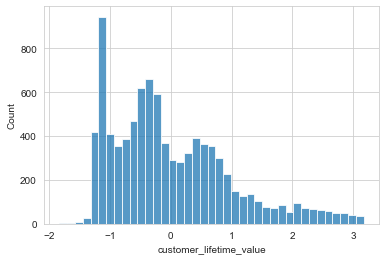

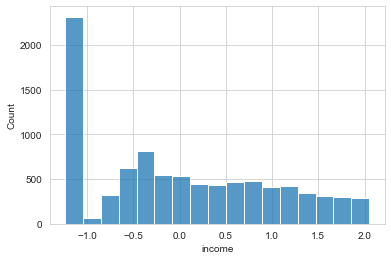

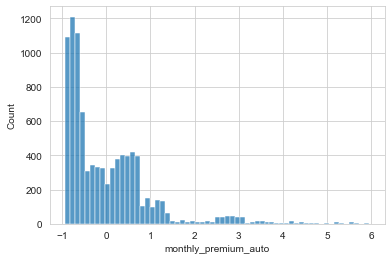

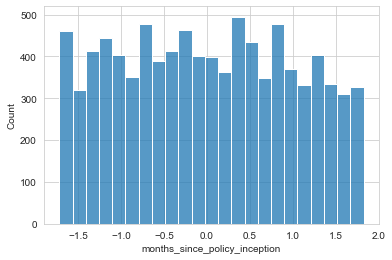

In [45]:
for i in x_cont_stand.columns:
    sns.histplot(x_cont_stand[i])
    plt.show()
    

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_cont_scaled = pd.DataFrame(scaler.fit_transform(x_cont), columns = x_cont.columns)
x_cont_scaled

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception
0,0.147185,0.562847,0.033755,0.050505
1,0.410703,0.000000,0.139241,0.424242
2,0.779971,0.487763,0.198312,0.383838
3,0.452352,0.000000,0.189873,0.656566
4,0.150321,0.438443,0.050633,0.444444
...,...,...,...,...
9129,0.187859,0.719547,0.050633,0.898990
9130,0.167998,0.216081,0.075949,0.282828
9131,0.484730,0.000000,0.101266,0.373737
9132,0.444762,0.219452,0.147679,0.030303


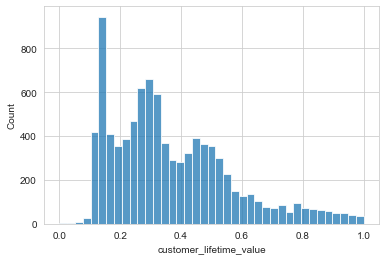

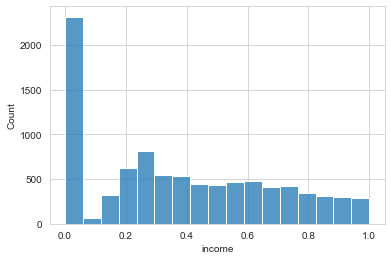

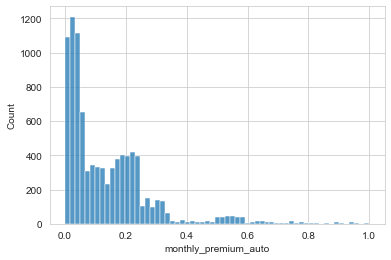

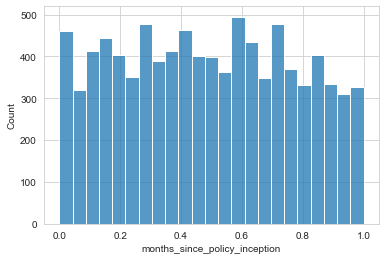

In [47]:
for i in x_cont_scaled.columns:
    sns.histplot(x_cont_scaled[i])
    plt.show()

In [48]:
#scaling discrete variables also
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_discr_scaled = pd.DataFrame(scaler.fit_transform(x_discr), columns = x_discr.columns)
x_discr_scaled

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,0.914286,0.0,0.000
1,0.371429,0.0,0.875
2,0.514286,0.0,0.125
3,0.514286,0.0,0.750
4,0.342857,0.0,0.000
...,...,...,...
9129,0.514286,0.0,0.125
9130,0.400000,0.0,0.000
9131,0.257143,0.6,0.125
9132,0.971429,0.0,0.250


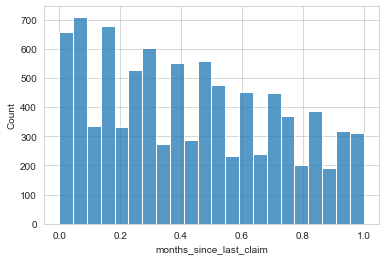

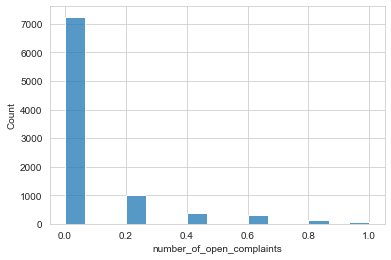

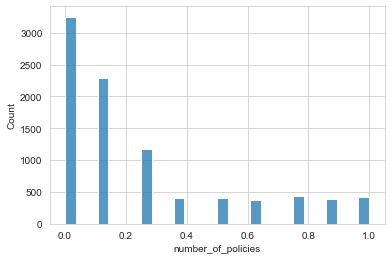

In [49]:
for i in x_discr_scaled.columns:
    sns.histplot(x_discr_scaled[i])
    plt.show()

### 4. Encode the categorical variables

In [50]:
# One hot to state
# Ordinal to coverage
# Ordinal to employmentstatus - can't allocate ordinal
# Ordinal to location code
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class
# Ordinal vehicle size

#data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
# given that column "coverage" in the dataframe "data" has three categories:
# "basic", "extended", and "premium" and values are to be represented in the same order.




In [51]:
#Applying ordinal encoding: 
x_cat["coverage"] = x_cat["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
x_cat["location_code"] = x_cat["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
x_cat["vehicle_size"] = x_cat["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

<ipython-input-51-2e59b8d63983>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cat["coverage"] = x_cat["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
<ipython-input-51-2e59b8d63983>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cat["location_code"] = x_cat["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
<ipython-input-51-2e59b8d63983>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

### 5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [52]:
#extracting the month
x_cat['effective_to_month'] = customer_df['effective_to_date'].dt.month
#customer_df['effective_to_date'].dt.year for year

<ipython-input-52-145326112851>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cat['effective_to_month'] = customer_df['effective_to_date'].dt.month


In [53]:
x_cat.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_month
0,BU79786,Washington,No,0,Bachelor,Employed,F,1,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,1,2
1,QZ44356,Arizona,No,1,Bachelor,Unemployed,F,1,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,1,1
2,AI49188,Nevada,No,2,Bachelor,Employed,F,1,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,1,2
3,WW63253,California,No,0,Bachelor,Unemployed,M,1,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,1,1
4,HB64268,Washington,No,0,Bachelor,Employed,M,0,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,1,2


### 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [54]:
#putting dataframe back together to perform OHE
x_processed = pd.concat([x_cont_scaled, x_discr_scaled, x_cat], axis = 1)
x_processed.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,customer,state,response,...,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_month
0,0.147185,0.562847,0.033755,0.050505,0.914286,0.0,0.000,BU79786,Washington,No,...,F,1,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,1,2
1,0.410703,0.000000,0.139241,0.424242,0.371429,0.0,0.875,QZ44356,Arizona,No,...,F,1,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,1,1
2,0.779971,0.487763,0.198312,0.383838,0.514286,0.0,0.125,AI49188,Nevada,No,...,F,1,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,1,2
3,0.452352,0.000000,0.189873,0.656566,0.514286,0.0,0.750,WW63253,California,No,...,M,1,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,1,1
4,0.150321,0.438443,0.050633,0.444444,0.342857,0.0,0.000,HB64268,Washington,No,...,M,0,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,1,2


In [55]:
x_processed.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,coverage,location_code,vehicle_size,effective_to_month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,0.366413,0.376645,0.135946,0.485501,0.431343,0.076878,0.245771,0.480622,0.979089,0.910444,1.463762
std,0.199404,0.303857,0.145181,0.281879,0.287807,0.182077,0.298773,0.655817,0.605732,0.537313,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.213365,0.000000,0.029536,0.242424,0.171429,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,0.318566,0.338959,0.092827,0.484848,0.400000,0.000000,0.125000,0.000000,1.000000,1.000000,1.000000
75%,0.482126,0.623318,0.202532,0.717172,0.657143,0.000000,0.375000,1.000000,1.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000


In [56]:
x_processed.nunique()

customer_lifetime_value          8136
income                           5694
monthly_premium_auto              202
months_since_policy_inception     100
months_since_last_claim            36
number_of_open_complaints           6
number_of_policies                  9
customer                         9134
state                               5
response                            2
coverage                            3
education                           5
employmentstatus                    5
gender                              2
location_code                       3
marital_status                      3
policy_type                         3
policy                              9
renew_offer_type                    4
sales_channel                       4
vehicle_class                       6
vehicle_size                        3
effective_to_month                  2
dtype: int64

In [57]:
#transforming customer into index prior dummifying, and dropping it
x_processed = x_processed.set_index(x_processed['customer']).drop('customer', axis = 1)
x_processed.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,...,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_month
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,0.147185,0.562847,0.033755,0.050505,0.914286,0.0,0.000,Washington,No,0,...,F,1,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,1,2
QZ44356,0.410703,0.000000,0.139241,0.424242,0.371429,0.0,0.875,Arizona,No,1,...,F,1,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,1,1
AI49188,0.779971,0.487763,0.198312,0.383838,0.514286,0.0,0.125,Nevada,No,2,...,F,1,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,1,2
WW63253,0.452352,0.000000,0.189873,0.656566,0.514286,0.0,0.750,California,No,0,...,M,1,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,1,1
HB64268,0.150321,0.438443,0.050633,0.444444,0.342857,0.0,0.000,Washington,No,0,...,M,0,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,1,2


In [58]:
x_f = pd.get_dummies(x_processed, drop_first = True)
x_f

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,coverage,location_code,vehicle_size,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,0.147185,0.562847,0.033755,0.050505,0.914286,0.0,0.000,0,1,1,...,0,0,0,0,0,0,0,0,0,1
QZ44356,0.410703,0.000000,0.139241,0.424242,0.371429,0.0,0.875,1,1,1,...,1,0,0,0,0,0,0,0,0,0
AI49188,0.779971,0.487763,0.198312,0.383838,0.514286,0.0,0.125,2,1,1,...,0,0,0,0,0,0,0,0,0,1
WW63253,0.452352,0.000000,0.189873,0.656566,0.514286,0.0,0.750,0,1,1,...,0,0,0,1,0,0,0,1,0,0
HB64268,0.150321,0.438443,0.050633,0.444444,0.342857,0.0,0.000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,0.187859,0.719547,0.050633,0.898990,0.514286,0.0,0.125,0,2,1,...,0,0,0,0,1,0,0,0,0,0
PK87824,0.167998,0.216081,0.075949,0.282828,0.400000,0.0,0.000,1,1,1,...,0,0,1,0,0,0,0,0,0,0
TD14365,0.484730,0.000000,0.101266,0.373737,0.257143,0.6,0.125,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [59]:
x_f[['coverage', 'location_code', 'vehicle_size', 'effective_to_month']]

,coverage,location_code,vehicle_size,effective_to_month
customer,,,,
BU79786,0,1,1,2
QZ44356,1,1,1,1
AI49188,2,1,1,2
WW63253,0,1,1,1
HB64268,0,0,1,2
...,...,...,...,...
LA72316,0,2,1,2
PK87824,1,1,1,2
TD14365,1,1,1,2


In [60]:
x_f.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,coverage,location_code,vehicle_size,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,...,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,0.366413,0.376645,0.135946,0.485501,0.431343,0.076878,0.245771,0.480622,0.979089,0.910444,...,0.156777,0.112109,0.281038,0.193234,0.145062,0.017845,0.020145,0.196628,0.052989,0.206481
std,0.199404,0.303857,0.145181,0.281879,0.287807,0.182077,0.298773,0.655817,0.605732,0.537313,...,0.363610,0.315517,0.449531,0.394857,0.352183,0.132397,0.140502,0.397470,0.224023,0.404802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.213365,0.000000,0.029536,0.242424,0.171429,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.318566,0.338959,0.092827,0.484848,0.400000,0.000000,0.125000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.482126,0.623318,0.202532,0.717172,0.657143,0.000000,0.375000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Lab | Comparing regression models

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

### Instructions

1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.
2. Try a simple linear regression with all the data to see whether we are getting good results.
3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
4. Use the function to check LinearRegressor and KNeighborsRegressor.
5. You can check also the MLPRegressor for this task!
6. Check and discuss the results.

### 1. Import sklearn train_test_split and separate the data.

In [61]:
#our data: y = total claim amount, x_f
X = x_f

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1608)

### 2. Try a simple linear regression with all the data to see whether we are getting good results.

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
model = LinearRegression()
lm = model.fit(X_train, y_train)
predictions = lm.predict(X_test)
residuals = predictions - y_test

#### 2.1 Validating the model

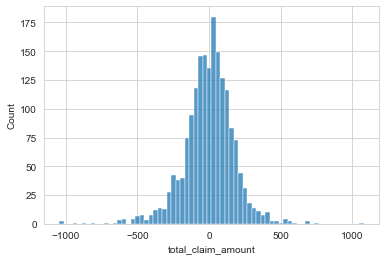

In [65]:
sns.histplot(residuals)

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [67]:
MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
R2 = r2_score(y_test, predictions)

print('MAE = ', MAE)
print('MSE = ', MSE)
print('R2 = ', R2)

MAE =  129.45069180890363
MSE =  31486.01359630515
R2 =  0.6208864860803964


### 3. Define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [68]:
def model_list(X, y, l):
    '''x - dataframe features
       y - target
       l - list comtaing models we need to test 
       i.e. ['LIN', 'KNN', 'MPL' ]    '''
   
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
    MAE = []
    MSE = []
    R2 = []
    R2_adj = []
    #creating a dataframe to display result of a function
    
    result = pd.DataFrame(columns = l, index = ['MAE', 'MSE','R2', 'R2_adj'])
    
    X_train, X_test, y_train, y_test = train_test_split \
            (X, y, test_size=0.2, random_state=1608)

    for i in range(len(l)):
        if l[i] == 'KNN':
            from sklearn.neighbors import KNeighborsRegressor
            model = KNeighborsRegressor(n_neighbors = 7) #7 works best out of 10
            
        elif l[i] == 'LIN':     
            from sklearn.linear_model import LinearRegression
            model = LinearRegression()
            
        elif l[i] == 'MPL':
            from sklearn.neural_network import MLPRegressor
            model = MLPRegressor(random_state=1, max_iter=2000) #testes max_iter
    
            
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        result[l[i]][0] = mean_absolute_error(y_test,y_pred) #MAE
        result[l[i]][1] = mean_squared_error(y_test,y_pred) #MSE
        result[l[i]][2] = r2_score(y_test,y_pred) # R2
        result[l[i]][3] =  1 - (1-r2_score(y_test, y_pred))* \
        (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1) #R2 adj
        
    return result 
    

In [69]:
l = ['LIN', 'KNN', 'MPL']
test = model_list(X, y, l)
test

,LIN,KNN,MPL
MAE,129.451,120.873,81.2773
MSE,31486,37035.1,14002.8
R2,0.620886,0.554071,0.831397
R2_adj,0.610652,0.542033,0.826845


### 4. Improving the model 

In [84]:
#rescaling categorical ordinal 

from sklearn.preprocessing import MinMaxScaler

ordinal_col = ['coverage', 'location_code', 'vehicle_size', 'effective_to_month']

x_cat_o =  x_f[ordinal_col]
scaler = MinMaxScaler()
x_cat_scaled = pd.DataFrame(scaler.fit_transform(x_cat_o), columns = x_cat_o.columns)
x_cat_scaled

,coverage,location_code,vehicle_size,effective_to_month
0,0.0,0.5,0.5,1.0
1,0.5,0.5,0.5,0.0
2,1.0,0.5,0.5,1.0
3,0.0,0.5,0.5,0.0
4,0.0,0.0,0.5,1.0
...,...,...,...,...
9129,0.0,1.0,0.5,1.0
9130,0.5,0.5,0.5,1.0
9131,0.5,0.5,0.5,1.0
9132,0.5,0.5,1.0,1.0


In [85]:
x_f_2 = x_f
x_f_2

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,coverage,location_code,vehicle_size,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,0.147185,0.562847,0.033755,0.050505,0.914286,0.0,0.000,0,1,1,...,0,0,0,0,0,0,0,0,0,1
QZ44356,0.410703,0.000000,0.139241,0.424242,0.371429,0.0,0.875,1,1,1,...,1,0,0,0,0,0,0,0,0,0
AI49188,0.779971,0.487763,0.198312,0.383838,0.514286,0.0,0.125,2,1,1,...,0,0,0,0,0,0,0,0,0,1
WW63253,0.452352,0.000000,0.189873,0.656566,0.514286,0.0,0.750,0,1,1,...,0,0,0,1,0,0,0,1,0,0
HB64268,0.150321,0.438443,0.050633,0.444444,0.342857,0.0,0.000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,0.187859,0.719547,0.050633,0.898990,0.514286,0.0,0.125,0,2,1,...,0,0,0,0,1,0,0,0,0,0
PK87824,0.167998,0.216081,0.075949,0.282828,0.400000,0.0,0.000,1,1,1,...,0,0,1,0,0,0,0,0,0,0
TD14365,0.484730,0.000000,0.101266,0.373737,0.257143,0.6,0.125,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [88]:
x_f_2[ordinal_col] = x_cat_scaled[ordinal_col].values
x_f_2[ordinal_col]

,coverage,location_code,vehicle_size,effective_to_month
customer,,,,
BU79786,0.0,0.5,0.5,1.0
QZ44356,0.5,0.5,0.5,0.0
AI49188,1.0,0.5,0.5,1.0
WW63253,0.0,0.5,0.5,0.0
HB64268,0.0,0.0,0.5,1.0
...,...,...,...,...
LA72316,0.0,1.0,0.5,1.0
PK87824,0.5,0.5,0.5,1.0
TD14365,0.5,0.5,0.5,1.0


In [89]:
x_f_2.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,coverage,location_code,vehicle_size,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,...,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,0.366413,0.376645,0.135946,0.485501,0.431343,0.076878,0.245771,0.240311,0.489545,0.455222,...,0.156777,0.112109,0.281038,0.193234,0.145062,0.017845,0.020145,0.196628,0.052989,0.206481
std,0.199404,0.303857,0.145181,0.281879,0.287807,0.182077,0.298773,0.327909,0.302866,0.268656,...,0.363610,0.315517,0.449531,0.394857,0.352183,0.132397,0.140502,0.397470,0.224023,0.404802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.213365,0.000000,0.029536,0.242424,0.171429,0.000000,0.000000,0.000000,0.500000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.318566,0.338959,0.092827,0.484848,0.400000,0.000000,0.125000,0.000000,0.500000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.482126,0.623318,0.202532,0.717172,0.657143,0.000000,0.375000,0.500000,0.500000,0.500000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
X = x_f_2
l = ['LIN', 'KNN', 'MPL']
test = model_list(X, y, l)
test

,LIN,KNN,MPL
MAE,129.451,149.384,81.143
MSE,31486,47402.2,14090.3
R2,0.620886,0.429244,0.830343
R2_adj,0.610652,0.413836,0.825763


In [ ]:
#Was better before